In [107]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import joblib
%matplotlib inline

In [18]:
df = pd.read_csv('../input/meatconsumption/meat_consumption_worldwide.csv')
df.shape

(13760, 5)

In [19]:
df.isna().sum()

LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64

In [20]:
df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


In [21]:
def plot_barh(y, x, title=None, xlabel=None, ylabel=None,figsize=(10,10),style='fivethirtyeight', color='blue', write_num=False):
    plt.style.use(style)
    fig, ax = plt.subplots(figsize=figsize)
    
    plt.barh(y, x, height=0.75, color=color)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if write_num:
        for i, v in enumerate(x):
            ax.text(v, i + .25, str(v))
    plt.show()


## Countries 

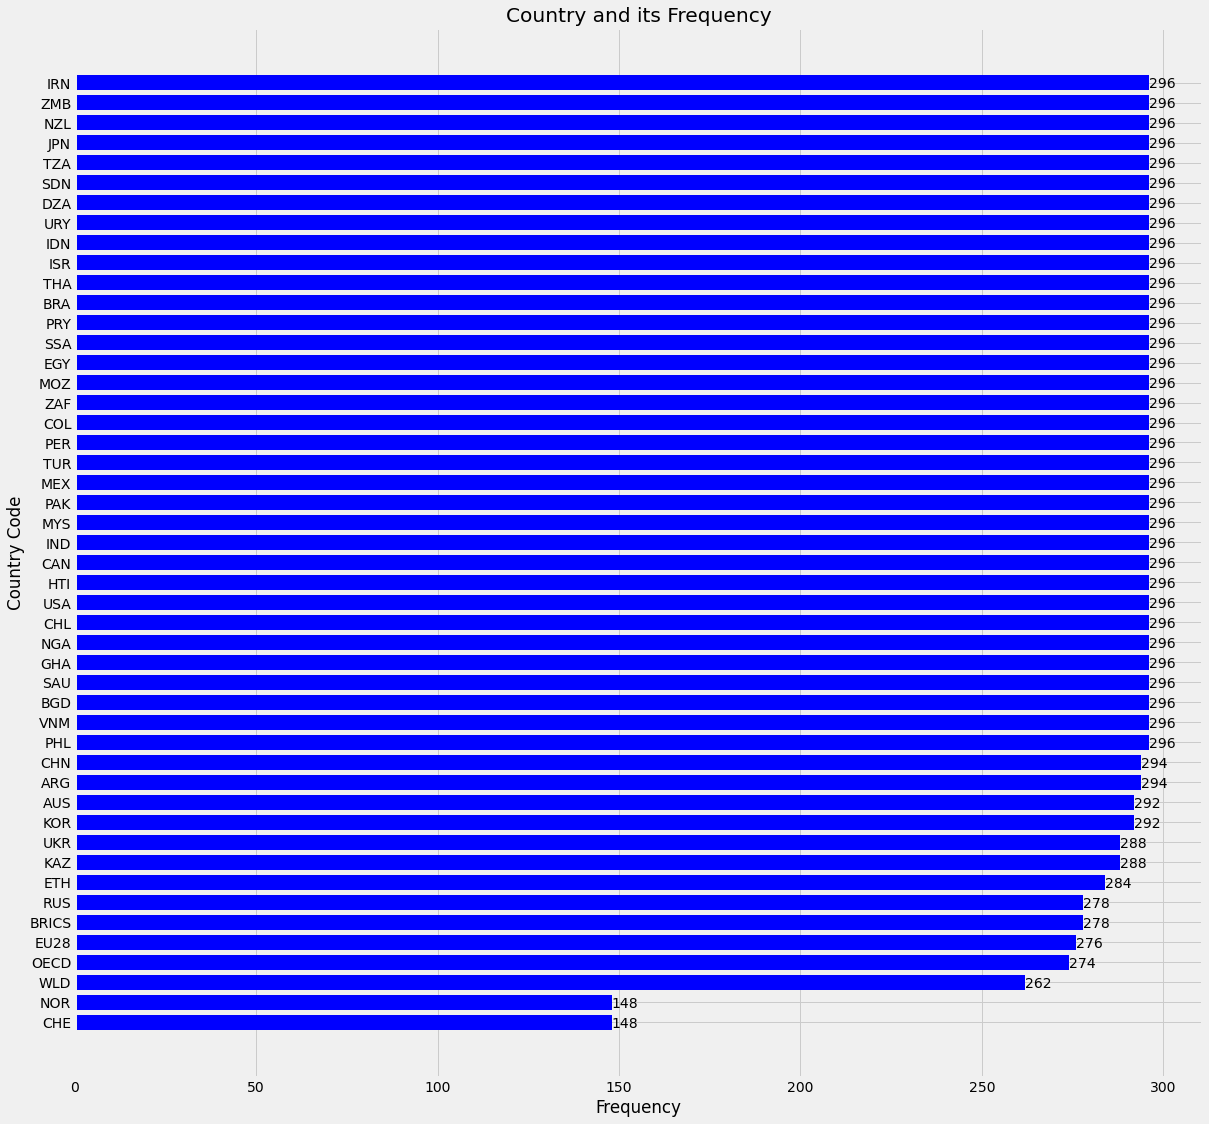

In [22]:
location_count = df['LOCATION'].value_counts()
country_code, count = location_count.keys(),location_count.values

plot_barh(country_code, count, write_num=True, figsize=(18,18), xlabel='Frequency', ylabel='Country Code', title="Country and its Frequency")

## Types of meat consumption

In [23]:
df['SUBJECT'].unique()

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

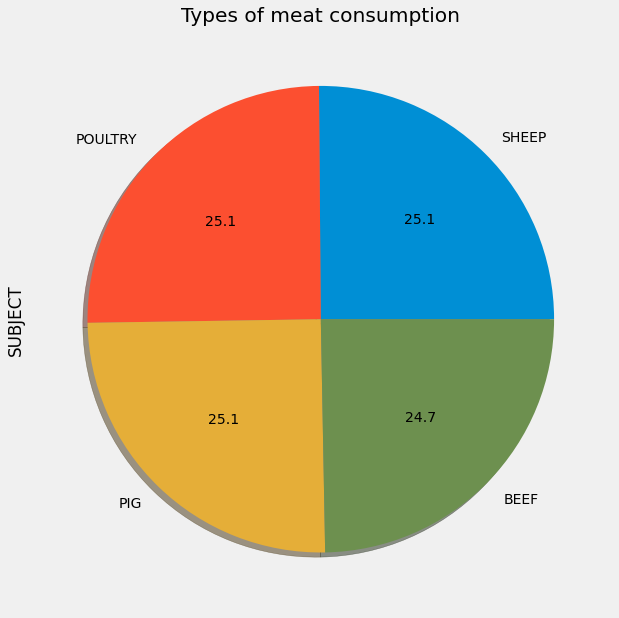

In [24]:
sub_keys = df['SUBJECT'].value_counts().keys()
plt.figure(figsize=(10,10))
df['SUBJECT'].value_counts().plot(kind='pie', labels=sub_keys,autopct="%.1f", shadow=True, title='Types of meat consumption')
plt.show()

## Country and it's meat consumption

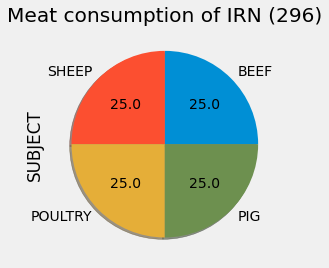

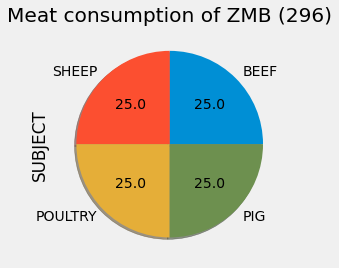

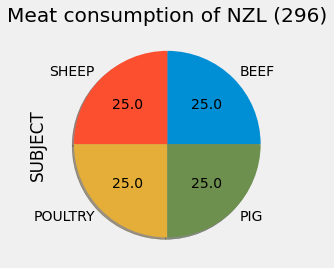

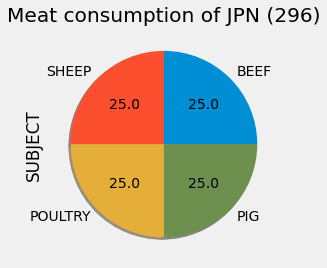

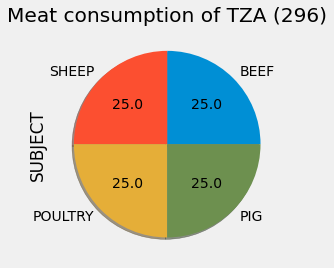

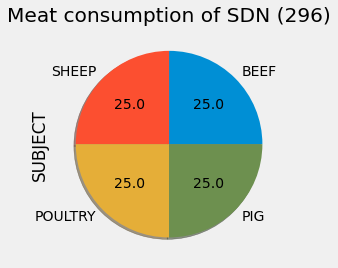

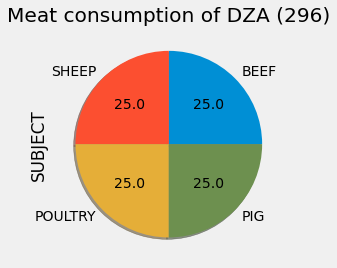

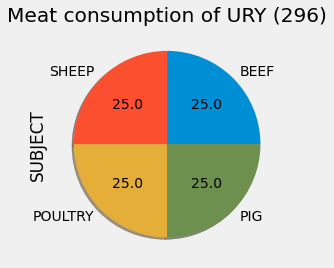

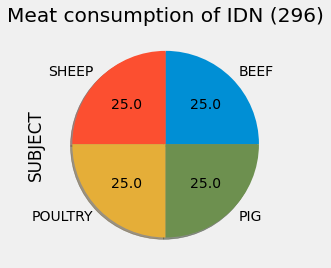

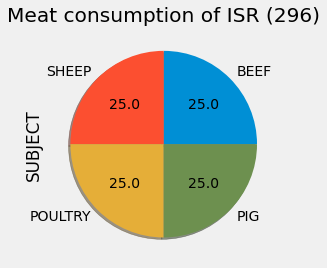

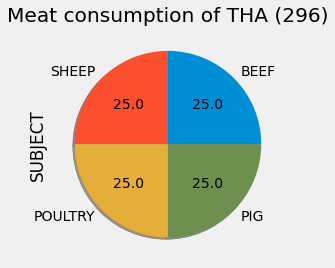

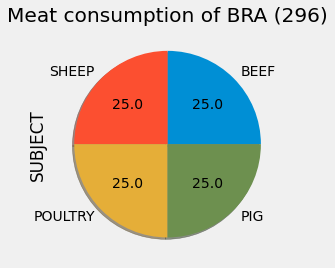

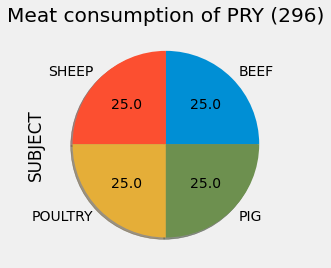

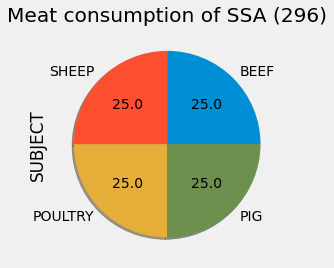

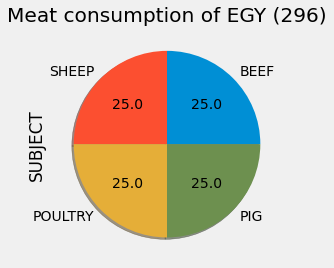

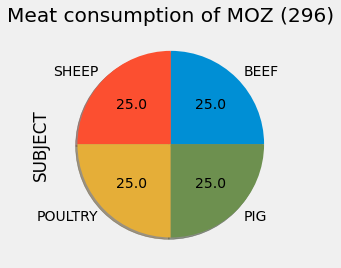

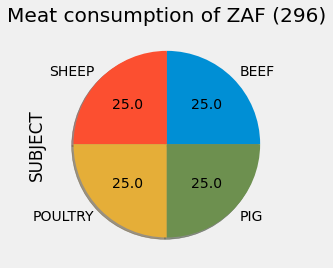

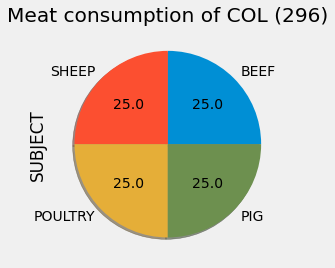

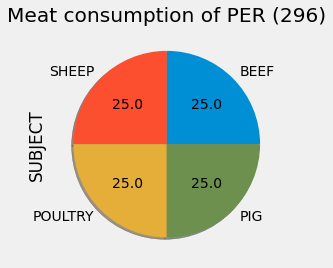

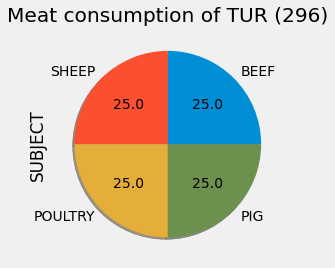

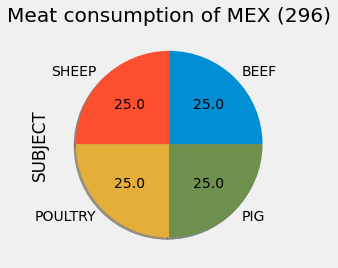

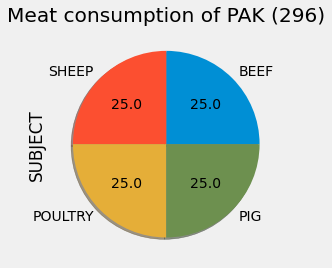

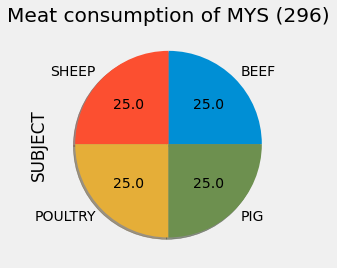

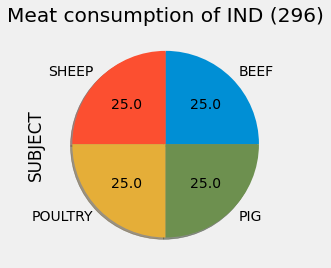

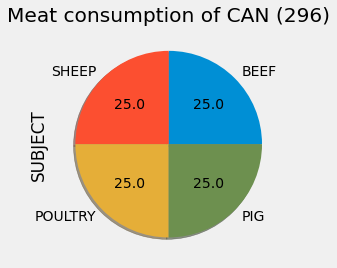

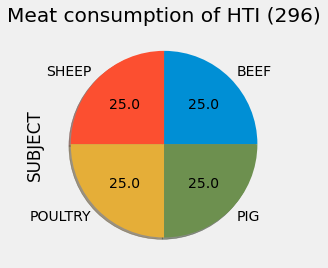

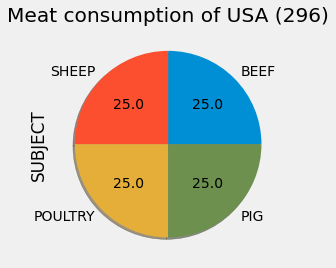

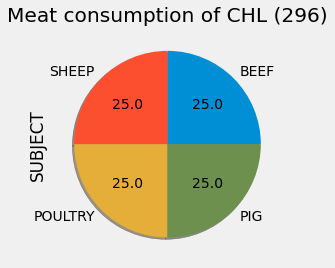

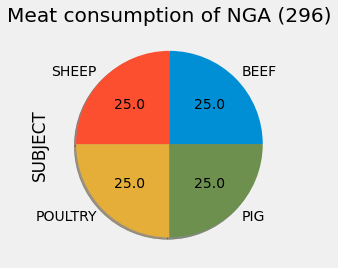

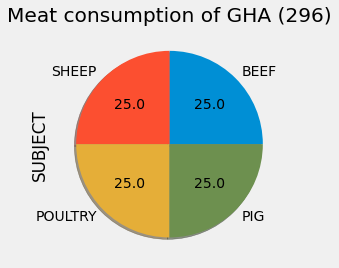

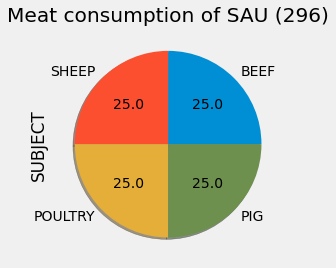

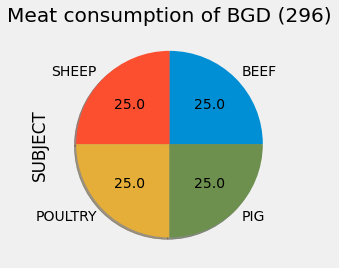

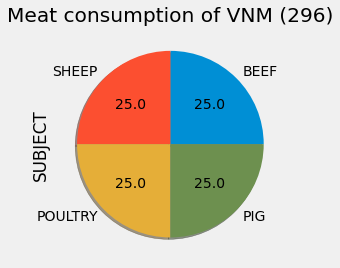

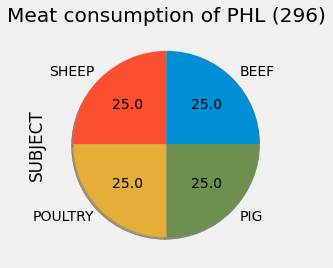

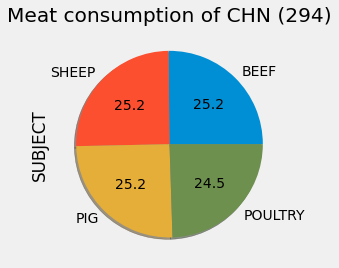

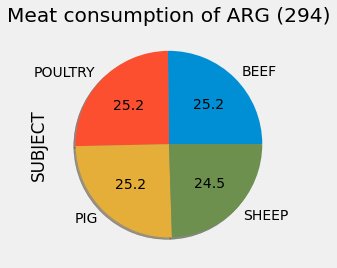

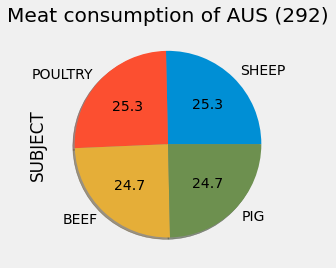

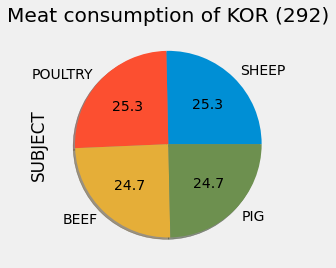

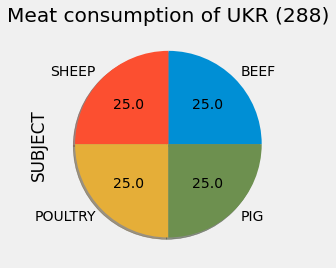

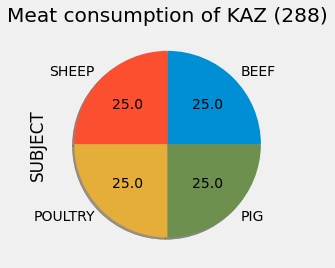

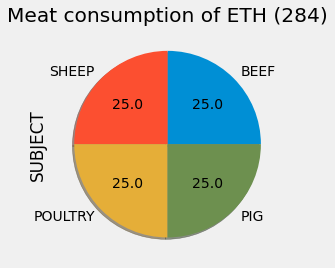

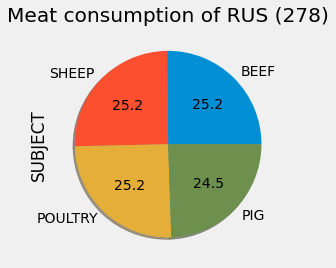

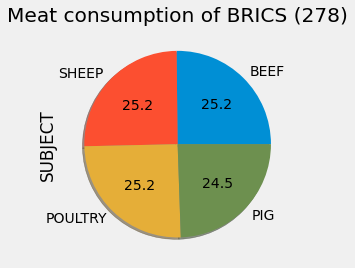

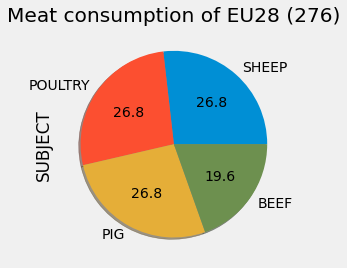

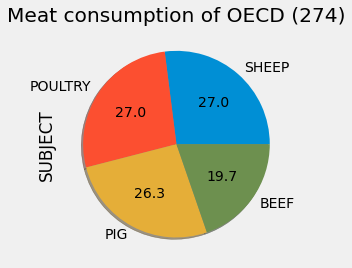

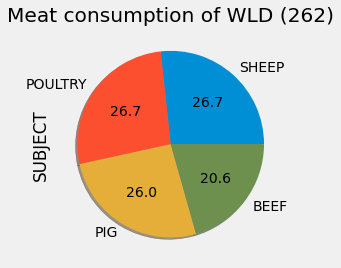

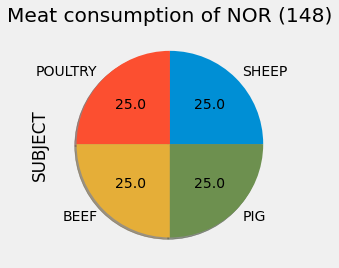

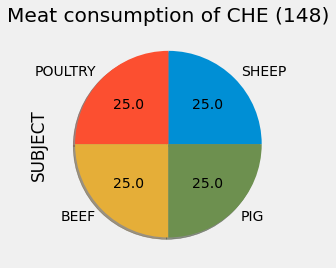

In [25]:
for country in country_code:
    subject_of_this_country = df['SUBJECT'][df['LOCATION'] == country]
    
    meats = subject_of_this_country.value_counts().keys()
    total = subject_of_this_country.value_counts().sum()
    
    subject_of_this_country.value_counts().plot(kind='pie',labels=meats, autopct="%.1f", shadow=True,title= f'Meat consumption of {country} ({total})')
    plt.show()
    print('\n')

## Total Value of each year 

In [26]:
years = sorted(df['TIME'].unique())

In [27]:
total_VALUE_per_year = []
for year in years:
    total_VALUE_per_year.append(df['Value'][df['TIME'] == year].sum())

In [28]:
year_and_total_value = pd.DataFrame({'Year':years,'total_value':total_VALUE_per_year})

In [29]:
year_and_total_value

,Year,total_value
0,1990,163080.112571
1,1991,207144.599094
2,1992,299968.842420
3,1993,421471.021225
4,1994,444821.320514
5,1995,460904.431669
6,1996,459282.368498
7,1997,484798.572149
8,1998,507851.396559
9,1999,515968.171011


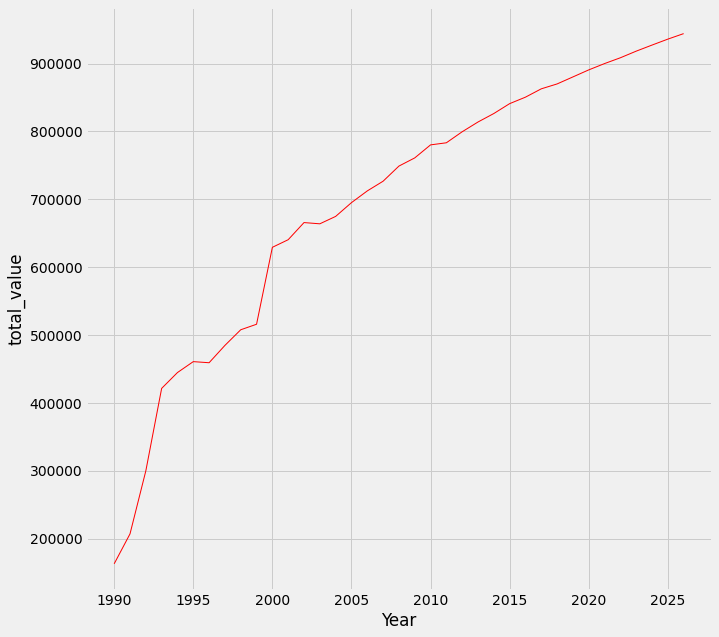

In [30]:
plt.figure(figsize=(10,10))
sns.lineplot(data=year_and_total_value, x='Year',y='total_value',linewidth=1,color='r')
plt.show()

## Measurements Used

In [31]:
df['MEASURE'].unique()

array(['KG_CAP', 'THND_TONNE'], dtype=object)

In [32]:
df['MEASURE'].value_counts()

THND_TONNE    7042
KG_CAP        6718
Name: MEASURE, dtype: int64

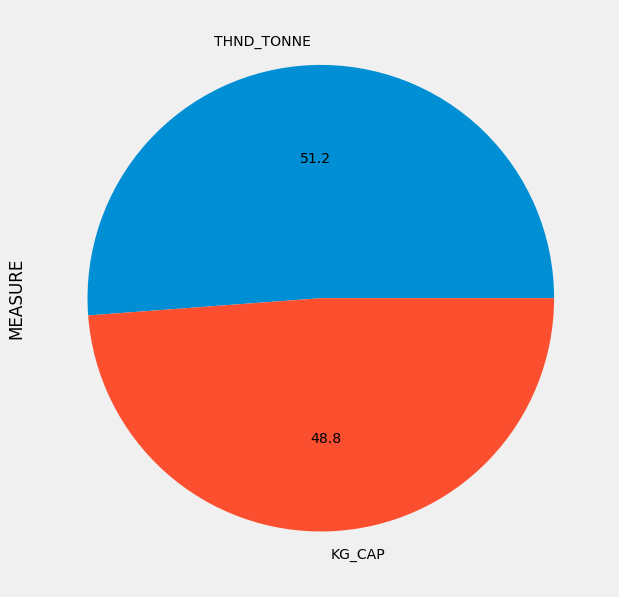

In [33]:
plt.figure(figsize=(10,10))
measure_keys = df['MEASURE'].value_counts().keys()
df['MEASURE'].value_counts().plot(kind='pie', labels=measure_keys, autopct="%.1f")
plt.show()

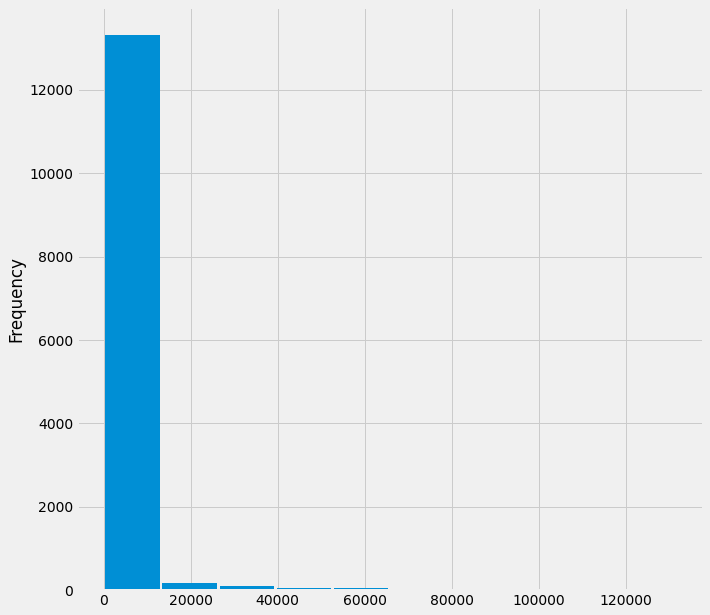

In [34]:
plt.figure(figsize=(10,10))
df['Value'].plot(kind='hist', rwidth=0.95)
plt.show()

## One Hot encoding

In [35]:
cols_to_encode = df.columns[:3]
new_df = pd.get_dummies(df[cols_to_encode],drop_first=True)

In [36]:
new_df.head()

,LOCATION_AUS,LOCATION_BGD,LOCATION_BRA,LOCATION_BRICS,LOCATION_CAN,LOCATION_CHE,LOCATION_CHL,LOCATION_CHN,LOCATION_COL,LOCATION_DZA,...,LOCATION_URY,LOCATION_USA,LOCATION_VNM,LOCATION_WLD,LOCATION_ZAF,LOCATION_ZMB,SUBJECT_PIG,SUBJECT_POULTRY,SUBJECT_SHEEP,MEASURE_THND_TONNE
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling the year column 

In [37]:
scaler = MinMaxScaler()
scaler.fit(df[['TIME']])

MinMaxScaler()

In [38]:
scalled_years = scaler.fit_transform(df[['TIME']]).flatten()

In [39]:
scalled_years[:5]

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889])

In [40]:
new_df['TIME'] = scalled_years
new_df['Value'] = df['Value']

In [41]:
new_df.shape

(13760, 53)

In [42]:
new_df.head()

,LOCATION_AUS,LOCATION_BGD,LOCATION_BRA,LOCATION_BRICS,LOCATION_CAN,LOCATION_CHE,LOCATION_CHL,LOCATION_CHN,LOCATION_COL,LOCATION_DZA,...,LOCATION_VNM,LOCATION_WLD,LOCATION_ZAF,LOCATION_ZMB,SUBJECT_PIG,SUBJECT_POULTRY,SUBJECT_SHEEP,MEASURE_THND_TONNE,TIME,Value
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.027778,27.721815
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.055556,26.199591
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.083333,26.169094
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.111111,25.456134
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.138889,25.340226


## Splitting the data 

In [43]:
x, y = new_df.drop('Value', axis=1), new_df['Value']

In [44]:
x.shape, y.shape

((13760, 52), (13760,))

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [46]:
x_train.shape, x_test.shape

((9632, 52), (4128, 52))

In [47]:
y_train.shape, y_test.shape

((9632,), (4128,))

## Model Building and  Predictions

In [48]:
models = [LinearRegression(), Lasso(), Ridge()]

for model in models:
    print("Model:", model)
    this_model = model
    this_model.fit(x_train, y_train)
    print("Score:",this_model.score(x_test, y_test))

Model: LinearRegression()
Score: 0.3507010557415472
Model: Lasso()
Score: 0.35085036348599663
Model: Ridge()
Score: 0.35120523737740916


## Using KNeighborsRegressor 

In [49]:
kn_model = KNeighborsRegressor()
kn_model.fit(x_train, y_train)
kn_model.score(x_test, y_test)

0.9987845170023467

In [50]:
kn_model.score(x_train, y_train)

0.9993881110531613

In [51]:
y_pred_test = kn_model.predict(x_test)
y_pred_train = kn_model.predict(x_train)

In [53]:
test = pd.DataFrame({
    'Y test': y_test,
    'Y predicted test': y_pred_test
})

train = pd.DataFrame({
    'Y train': y_train,
    'Y predicted train': y_pred_train
})

In [55]:
test.sample(7)

,Y test,Y predicted test
10791,837.000000,824.969122
6633,32.258429,32.177776
9421,82.974720,97.149993
7704,2.034033,2.162478
6382,26.148835,25.774223
2997,2.114371,1.915948
13063,132.000000,160.400000


In [56]:
train.sample(7)

,Y train,Y predicted train
3911,1.380404,1.426843
1710,28.013762,28.660389
9469,14.276467,14.107099
12212,1888.490422,1889.857893
1901,0.522877,0.571640
7871,569.000000,512.272330
3619,36.172202,37.049175


In [75]:
train.sample(7)

,Y train,Y predicted train
6728,6.000000,6.573590
2378,2.913176,3.069684
13489,4337.000000,4433.837729
964,6.305645,7.290122
656,12.690280,12.632476
5574,0.411167,0.411001
12631,189.000000,194.000000


In [108]:
test.corr()

,Y test,Y predicted test
Y test,1.000000,0.999437
Y predicted test,0.999437,1.000000


In [109]:
train.corr()

,Y train,Y predicted train
Y train,1.000000,0.999694
Y predicted train,0.999694,1.000000


In [110]:
mean_absolute_error(y_test,y_pred_test)

55.569534858321326

In [111]:
mean_absolute_error(y_train,y_pred_train)

39.13678610415385

# **Compare actual and predicted**

In [72]:
test.sort_values(by= ['Y test'], inplace=True)
train.sort_values(by= ['Y train'], inplace=True)

In [103]:
def compare(df, title=None):
    col1, col2 = df.columns 
    plt.figure(figsize=(10,10))
    plt.scatter(df[col1], df[col2], color='b')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

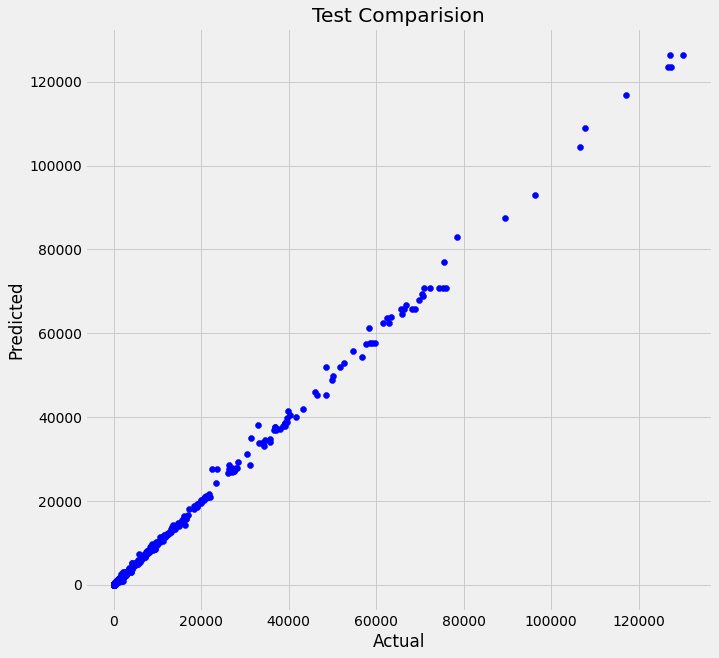

In [104]:
compare(test, 'Test Comparision')

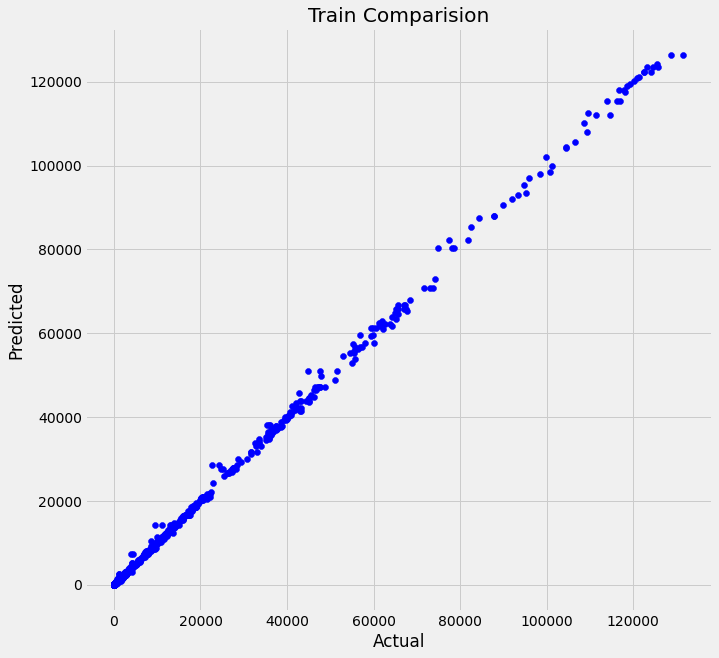

In [105]:
compare(train, 'Train Comparision')

# **Saving model as file**

In [112]:
joblib.dump(kn_model, 'Meat-comsumption-Model')

['Meat-comsumption-Model']

In [113]:
!ls

Meat-comsumption-Model	__notebook_source__.ipynb
